In [1]:
# Import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from datetime import datetime
import seaborn as sns
import os
os.chdir("D:/Titanic")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import time
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Reading the Titanic dataset
Train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")

print('Train Data Summary')
print(Train.shape)
print(Train.info())
print('-'*50)
print('Test Data Summary')
print(Test.shape)
print(Test.info())

Train Data Summary
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------------------------------------------
Test Data Summary
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null

In [3]:
print('Missing values in Train: ')
Train.isna().sum()

Missing values in Train: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print('Missing values in Test: ')
Test.isna().sum()

Missing values in Test: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

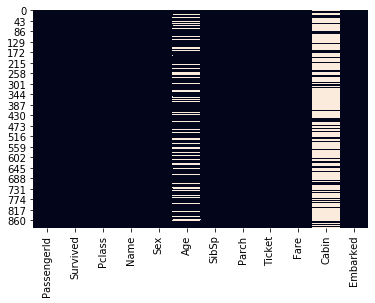

In [5]:
# For the variables missing in Train data lets visualize for patterns
sns.heatmap(Train.isna(), cbar = False)

0

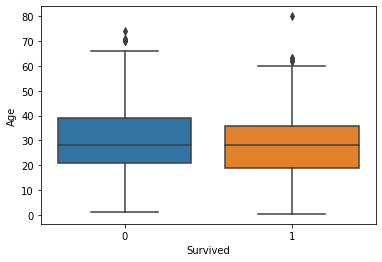

In [6]:
# Get Countplot for variables with Target
sns.boxplot(x= Train['Survived'], y= Train['Age'])

# The Age variable contains outliers.
# This explains there were few persons on the Ship whose age was very high, they were more likely to get affected by the sinking
# of the ship. Also there were few persons on board whose Age was below 10 (0 in some cases) which is not possible.
# Hence replacing the missing values by median.

Train['Age'] = Train['Age'].fillna(Train['Age'].median())
Train['Age'].isna().sum()

0

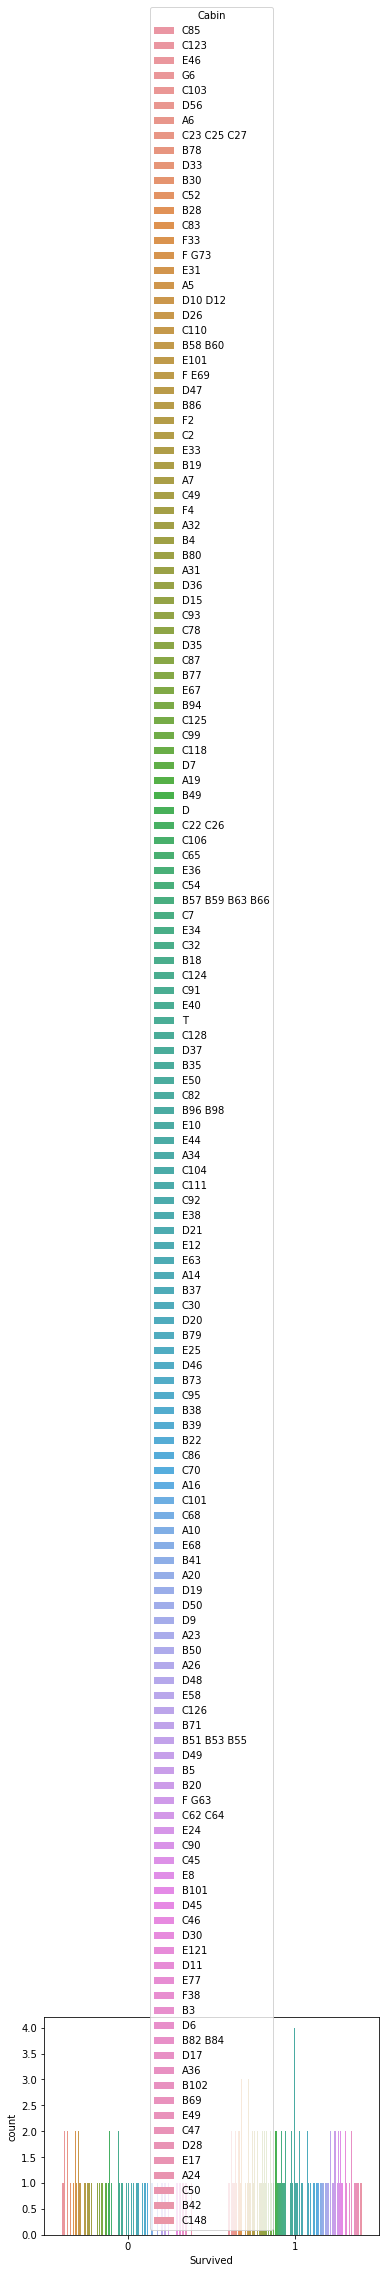

In [7]:
sns.countplot(x= Train['Survived'], data=Train, hue='Cabin')

# Too many cabins and too many issing values. In standard case we ust drop this variable.
# But, cabin number also defines the cabin position. The way ship sank, cabins near the hitting point must have got affected
# first and water flow or damage to persons in those is more likely to cause a death to them than other passengers.
# This is a judgemental choice. We will combine all those in one category and later use it if needed

Train['Cabin'] = Train['Cabin'].fillna('XYZ')
Train['Cabin'].isna().sum()

0

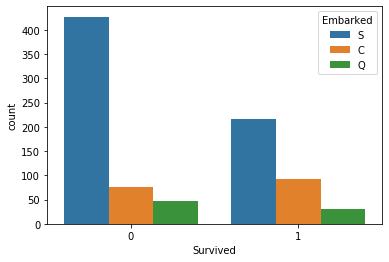

In [8]:
sns.countplot(x= Train['Survived'], data=Train, hue='Embarked')

# Very few missing values here. Can be replaced by mode of 'Embarked'

Train['Embarked'] = Train['Embarked'].fillna(Train['Embarked'].mode()[0])
Train['Embarked'].isna().sum()

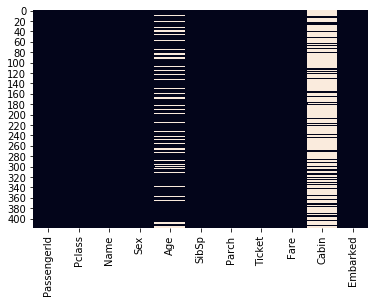

In [9]:
# For the variables missing in Train data lets visualize for patterns
sns.heatmap(Test.isna(), cbar = False)

# Same heatmap is observed for Train data. hence, the variables in the Test will be treated the same way as in Train.
Test['Age'] = Test['Age'].fillna(Test['Age'].median())
Test['Cabin'] = Test['Cabin'].fillna('XYZ')
Test['Embarked'] = Test['Embarked'].fillna(Test['Embarked'].mode()[0])
Test['Fare'] = Test['Fare'].fillna(Test['Fare'].median())

In [10]:
# Check if missing values have been replaced or not before proceeding further
print(Train.isna().sum())
print('-'*50)
print(Test.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
--------------------------------------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [11]:
# Checking summary statistics for Train Data to check for insights

Var_list = Train.columns 

for name in Var_list:
    print(name)
    print('-'*50)
    
    if str(Train[name].dtypes) == 'object':
        print(str(Train[name].value_counts()))
        print(" ")
    elif str(Train[name].dtypes) == 'float64':
        print(Train.agg({name : ['mean', 'median', 'count', 'std', 'skew', 'min', 'max']}))
        print(" ")
    elif str(Train[name].dtypes) == 'int64':
        print(Train.agg({name : ['mean', 'median', 'count', 'std', 'skew', 'min', 'max']}))
        print(" ")
    else:
        print('No Summary')
        print(" ")
        
# Conclusions

PassengerId
--------------------------------------------------
        PassengerId
mean     446.000000
median   446.000000
count    891.000000
std      257.353842
skew       0.000000
min        1.000000
max      891.000000
 
Survived
--------------------------------------------------
          Survived
mean      0.383838
median    0.000000
count   891.000000
std       0.486592
skew      0.478523
min       0.000000
max       1.000000
 
Pclass
--------------------------------------------------
            Pclass
mean      2.308642
median    3.000000
count   891.000000
std       0.836071
skew     -0.630548
min       1.000000
max       3.000000
 
Name
--------------------------------------------------
Webber, Miss. Susan                                      1
Frauenthal, Dr. Henry William                            1
Hart, Mr. Benjamin                                       1
Davies, Master. John Morgan Jr                           1
Sawyer, Mr. Frederick Charles                            

In [12]:
# Dropping unnecessary columns from Train and Test
Train.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=True)
Test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [13]:
# The categorical varible Sex and Embarked need to be converted into dummy variables before proceeding
# Dummy coding can be done via map function or get_dummies funnction or OneHot Encoder class
Sex_dummies = pd.get_dummies(Train['Sex'], prefix='Sex').iloc[:,1:]
Embarked_dummies = pd.get_dummies(Train['Embarked'], prefix='Embarked').iloc[:, 1:]
Train = pd.concat([Train, Sex_dummies, Embarked_dummies], axis=1)
Train = Train.drop(['Sex', 'Embarked'], axis=1)

Sex_dummies = pd.get_dummies(Test['Sex'], prefix='Sex').iloc[:,1:]
Embarked_dummies = pd.get_dummies(Test['Embarked'], prefix='Embarked').iloc[:, 1:]
Test = pd.concat([Test, Sex_dummies, Embarked_dummies], axis=1)
Test = Test.drop(['Sex', 'Embarked'], axis=1)

In [14]:
# Seperation
y = Train['Survived']
X = Train.drop(['Survived'], axis=1)

In [15]:
# Data Partition
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(534, 8)
(534,)
(357, 8)
(357,)


In [17]:
def model_performance(tr_X, tr_y, val_X):
    
    # 1
    # Fitting logistic regression
    from sklearn.linear_model import LogisticRegression
    classifier_LR = LogisticRegression(random_state = 0)
    classifier_LR.fit(tr_X, tr_y)
    
    # Printing logistic regression training accuracy
    print('Logistic Regression for Training data: ',classifier_LR.score(tr_X,tr_y))
    
    # Getting logistic regression predictions on validation data
    y_pred_LR = classifier_LR.predict(val_X)
    
    
    # Printing logistic regression validation accuracy
    print('Logistic Regression for Validation data: ',accuracy_score(y_val, y_pred_LR))
    print('-'*50)
    
    # 2
    # Fitting kNN
    from sklearn.neighbors import KNeighborsClassifier
    classifier_Knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p=2)
    classifier_Knn.fit(tr_X,tr_y)
    
    # Printing Knn training accuracy
    print('Knn for Training data: ', classifier_Knn.score(tr_X,tr_y))
    
    # Getting Knn predictions on validation data
    y_pred_Knn = classifier_Knn.predict(val_X)
    
    # Printing Knn validation accuracy
    print('Knn for Validation data: ', accuracy_score(y_val, y_pred_Knn))
    print('-'*50)
    
    # 3
    # Fitting Decision tree
    from sklearn.tree import DecisionTreeClassifier
    classifier_DT = DecisionTreeClassifier(criterion = 'gini',random_state = 0)
    classifier_DT.fit(tr_X,tr_y)
    
    # Printing Decision Tree training accuracy
    print('Decision Tree for Training data: ',classifier_DT.score(tr_X,tr_y))
    
    # Getting Decision tree predictions on validation data
    y_pred_DT = classifier_DT.predict(val_X)
    
    # Printing Decision Tree validation accuracy
    print('Decision Tree for Validation data: ', accuracy_score(y_val, y_pred_DT))
    print('-'*50)
    
    
    # 4
    # Using Random Forest
    from sklearn.ensemble import RandomForestClassifier
    classifier_RF = RandomForestClassifier(n_estimators = 10,criterion = 'gini',random_state=0)
    classifier_RF.fit(tr_X,tr_y)
    
    # Printing Random Forest training accuracy
    print('Random Forest for Training data: ',classifier_RF.score(tr_X,tr_y))
    
    # Getting Random Forest predictions on validation data
    y_pred_RF = classifier_RF.predict(val_X)
    
    # Printing Random Forest validation accuracy
    print('Random Forest for Validation data: ', accuracy_score(y_val, y_pred_RF))
    print('-'*50)
    
    return classifier_LR, classifier_Knn, classifier_DT, classifier_RF, y_pred_LR, y_pred_Knn, y_pred_DT, y_pred_RF
    

In [18]:
best_model = model_performance(X_train, y_train, X_val)

Logistic Regression for Training data:  0.8052434456928839
Logistic Regression for Validation data:  0.7983193277310925
--------------------------------------------------
Knn for Training data:  0.7940074906367042
Knn for Validation data:  0.7226890756302521
--------------------------------------------------
Decision Tree for Training data:  0.9831460674157303
Decision Tree for Validation data:  0.7647058823529411
--------------------------------------------------
Random Forest for Training data:  0.9681647940074907
Random Forest for Validation data:  0.7703081232492998
--------------------------------------------------


In [19]:
# Select the best model at this stage. Remove non important features and test that model
LR = best_model[1]
pred_LR = best_model[5]
# Assuming the best is Random Forest
# forest = model_performance[3]
# importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
# importances = importances.sort_values('importance',ascending=False).set_index('feature')
# print(importances)

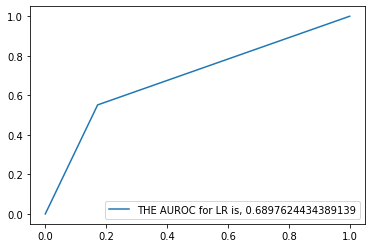

In [20]:
# The plot for best model validation curve
fpr, tpr, _ = metrics.roc_curve(y_val,  pred_LR)
auc = metrics.roc_auc_score(y_val, pred_LR)
plt.plot(fpr,tpr,label="THE AUROC for LR is, "+str(auc))
plt.legend(loc=4)
# plt.savefig('data/AUC.png', bbox_inches='tight')
plt.show()

In [21]:
# Generate predictions on test data and check accuracy
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)    
y_pred_LR = classifier_LR.predict(Test)

In [22]:
Test = pd.read_csv("test.csv")
Test = pd.concat([Test['PassengerId'], pd.DataFrame(y_pred_LR)], axis=1)
Test = Test.rename(columns={0: "Survived"})

In [23]:
# Writing predictions
Test.to_csv("Predictions3.csv", index=False)

In [ ]:
#count of survivers for the counts for columns 'sex','pclass','sibSp','parch','embarked'

cols = ['Sex','Pclass','SibSp','Parch','Embarked']
n_rows=2
n_cols=3
#There will be total 5 valid plots but as the number of rows and columns are 2 and 3 respectively we will get an index out of bound warning.

#subplot grid and figure size of each graph
fig,axs = plt.subplots(n_rows,n_cols,figsize = (n_cols*3.2,n_rows*3.2))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i =r*n_cols + c#index to go through no of cols
        ax = axs[r][c]#shows to where to position subplot
        sns.countplot(train[cols[i]],hue = train['Survived'], ax = ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc = "best")

plt.tight_layout()

In [ ]:
def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['grp_score'] = round((data['Distribution Good']/(data['Distribution Good'] + data['Distribution Bad']))*10, 2)
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()
    data['Efficiency'] =  abs(data['Distribution Good'] - data['Distribution Bad'])/2  
    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    d = data[[
      'Distribution Good',
      'Distribution Bad',
      'Share',
      'Bad Rate',
      'grp_score',
      'WoE',
      'IV',
      'Efficiency'
  ]]

    mydf=pd.DataFrame(data=d)

    if pr == 1:
        print(data)

    #return data['IV'].values[0]
    return mydf.values